In [25]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('cropped_Wild018.tif')
original_img = img[:,:,0]
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)


ablur = cv2.blur(original_img,(32, 32))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,141,4) 

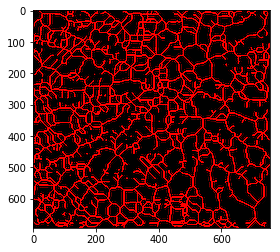

In [26]:
#ADAPTIVE SKELETON
from skimage.morphology import skeletonize
adaptiveskeleton = skeletonize(a_mthres)
ax = plt.subplot()
ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc')

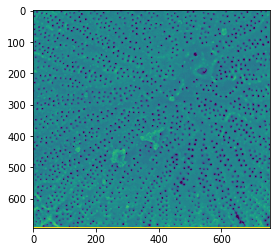

In [27]:
#dilated SKELETON
from skimage.morphology import dilation
dilationimg = dilation(original_img)
ax = plt.subplot()
ax.imshow(dilationimg)

In [28]:
dilablur = cv2.blur(dilationimg,(30, 30))
dilatedthreshold = cv2.adaptiveThreshold(dilablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,151,4) 

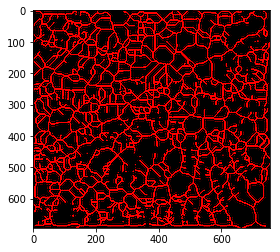

In [29]:
#DILATED SKELETON
from skimage.morphology import skeletonize
dilatedskeleton = skeletonize(dilatedthreshold)
ax = plt.subplot()
ax.imshow(dilatedskeleton, cmap=red2, interpolation='sinc')

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


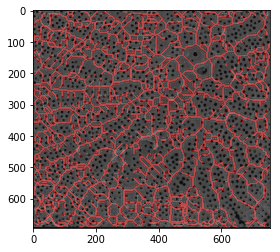

In [30]:
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc', alpha=.42) 

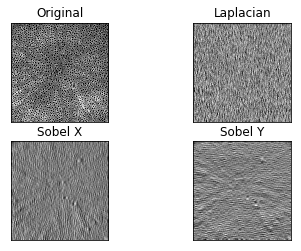

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('cropped_Wild013.tif',0)


laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)


blurlaplacian=cv2.blur(laplacian,(1,10))
blursobelx=cv2.blur(sobelx,(10,10))
blursobely=cv2.blur(sobely,(10,10))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(blurlaplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(blursobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(blursobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

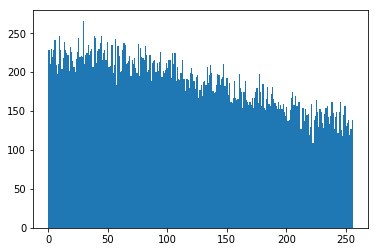

In [57]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

plt.hist(blursobelx.ravel(),256,[0,256]); plt.show()

-1.5013671874999872


/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


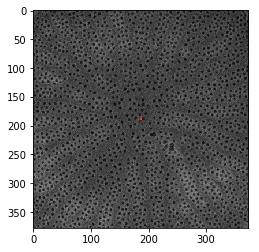

In [60]:
img = cv2.imread('cropped_Wild013.tif')
#blur = cv2.blur(img,(15,15))

from skimage.filters import threshold_otsu
thotsu=threshold_otsu(blurlaplacian)
print(thotsu)
otsublur = img[:,:,0] > thotsu

from skimage.morphology import skeletonize
otsuskeleton = skeletonize(otsublur)
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(otsuskeleton, cmap=red2, interpolation='sinc', alpha=.42) 